<a href="https://colab.research.google.com/github/seo-bo-hyun/20210322-AI-603/blob/main/Mnist_classfication_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras import datasets

In [ ]:
def DNN_ModelSequential(n_input, n_hidden, n_hidden2, n_out):
  model = Sequential()
  model.add(Dense(n_hidden, input_shape=(n_input,), activation='relu'))
  model.add(Dense(n_hidden2, activation='relu'))
  model.add(Dense(n_out, activation='softmax')) 

  opt = Adam(lr=0.01)
  model.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
label = ['T-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


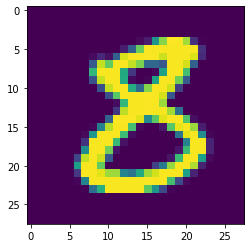

8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   6  19 133 209
  255 254 220  35   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  21  77 197 254 253 253
  253 253 253 253  36   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   7  28  11  78 240 253 253 254 253 236
  253 253 253 241  31   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  72 233 194 253 253 232 205  85  84  69
  253 253 239  79   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 155  41   0 

In [ ]:
mySample = np.random.randint(60000)
plt.imshow(X_train[mySample])
plt.show()
print(Y_train[mySample])
print(X_train[mySample])

In [ ]:
def Data_func():
  (X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
  Y_train = np_utils.to_categorical(Y_train)
  Y_test = np_utils.to_categorical(Y_test)
  L, W, H = X_train.shape
  X_train = X_train.reshape(-1, W * H)
  X_test = X_test.reshape(-1, W * H)
  X_train = X_train / 255
  X_test = X_test / 255
  return (X_train, Y_train), (X_test, Y_test)

In [ ]:
model = DNN_ModelSequential(784, 128, 128, 10)
(x_train, y_train), (x_test, y_test) = Data_func()
print(model.summary())
print(x_train.shape, y_train.shape)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None
(60000, 784) (60000, 10)


In [ ]:
fit_hist = model.fit(x_train, y_train, epochs=15, batch_size=128, 
                     validation_split=0.2)
performance_test = model.evaluate(x_test, y_test, batch_size=128)
print('test Loss Accurecy -> ',performance_test)

Epoch 1/15
375/375 [==============================] - 3s 5ms/step - loss: 0.2505 - accuracy: 0.9218 - val_loss: 0.1617 - val_accuracy: 0.9481
Epoch 2/15
375/375 [==============================] - 2s 4ms/step - loss: 0.1258 - accuracy: 0.9622 - val_loss: 0.1408 - val_accuracy: 0.9598
Epoch 3/15
375/375 [==============================] - 2s 5ms/step - loss: 0.1026 - accuracy: 0.9690 - val_loss: 0.1434 - val_accuracy: 0.9602
Epoch 4/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0898 - accuracy: 0.9733 - val_loss: 0.1223 - val_accuracy: 0.9675
Epoch 5/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0858 - accuracy: 0.9754 - val_loss: 0.1515 - val_accuracy: 0.9619
Epoch 6/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0775 - accuracy: 0.9779 - val_loss: 0.1276 - val_accuracy: 0.9682
Epoch 7/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0737 - accuracy: 0.9779 - val_loss: 0.1414 - val_accuracy: 0.9643
Epoch 

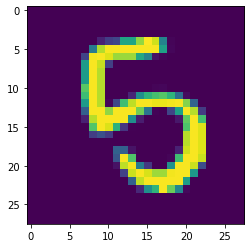

5
5


In [ ]:
mySample = np.random.randint(10000)
plt.imshow(X_test[mySample])
plt.show()
print(Y_test[mySample])
pred = model.predict(x_test[mySample].reshape(-1,784))
print(np.argmax(pred))

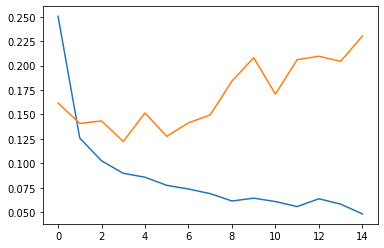

In [ ]:
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.show()

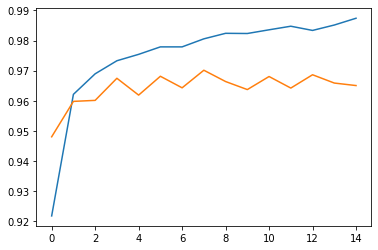

In [ ]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()